A toy program to generate a sequence of random
numbers distributed according to ANY probability
distribution using the Metropolis-Hastings algorithm.

The probability distribution of interest is myPDF(x)
It does not need to be normalized.
It is hardcoded.  Easy to change.

The user needs to supply a few things.

First:
A pdf that is used to move in the
sequence of random numbers from x to y.
This is the so called "proposal distribution" 
P(y|x).
Note: this is NOT the probability of the 
nth random number being y if the nth-1 is x.
But it is related to it.....
In principle P(y|x) can be ANY function as long as it
is non-zero in the domain of validity of myPDF. 
The proposal function is of the Metropolis type, ie,
P(y|x) = P(x|y)
It is hardcoded as proposal(x) and returns y
Note that the returned value is still just a "proposal"
so it can be accepted or rejected

Second:
An initial value of x.  
It can be anything but it must have myPDF(x) > 0
It probably makes sense for this to be somewhere in the bulk
of the distribution of interest.

Third: 
The number of members of the chain to generate  (n)

Fourth:
The number of initial members of the chain to 
ignore (the so called burn-in, nBurn)

To visualize the chain, we fill a histogram of members of the chain.
The parameters of the histogram are hardcoded.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# PDF
# Harcode a gaussian 
# No need to normalize!!!!
def myPDF(x, mean, sigma):
    return np.exp( -(x-mean)**2 / (2*sigma**2) )

In [3]:
# Proposal
# Uniform random step between -1 and 1 (simple, a bit stupid..)
# It can be any function, does not need to be flat/
def proposal(x):
    step = 1.
    return x - step + 2*step*np.random.rand()

In [4]:
# initialize random number
np.random.seed(1629871)

# Parameters of the gaussian
mean  = 3
sigma = 1.5

# Parameters of the chain
xstart = 0.
n      = 10000
nBurn  = 1000

# initialize chain as list
xlist = [xstart]

In [5]:
# do n+nBurn-1 steps  (we alread have 1 step...)
for i in range(n+nBurn-1):
    xp    = proposal(xlist[-1])
    fnow  = myPDF(xlist[-1], mean, sigma)
    fnext = myPDF(xp,        mean, sigma)
    if np.random.rand() < fnext/fnow:
        xlist.append(xp)
    else:
        xlist.append(xlist[-1])
        
# put list into array removing the burn in part
xr = np.array( xlist[nBurn : ] )

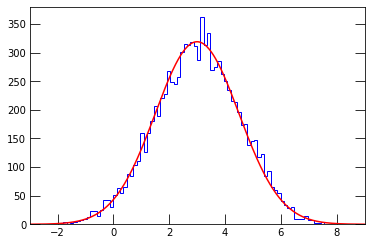

In [6]:
# now plot it...go out to 4 sigma
low   = mean - 4*sigma
high  = mean + 4*sigma
nbins = 100
bins  = np.linspace(low, high, nbins+1)
ax    = plt.subplot(111)
contents, bins, _ = ax.hist(xr, bins, histtype='step', color='blue')
ax.set_xlim(bins[0], bins[-1])
ax.tick_params("both", direction='in', length=10, right=True)
# Also show a gaussian curve of correct mean,sigma.
# Properly normalized given number of entries and binsize.
binsize = bins[1]-bins[0]
xx      = np.arange(bins[0], bins[-1], 0.01)
yy      = binsize * len(xr) * stats.norm.pdf(xx, mean, sigma)
_ = ax.plot(xx, yy, color='red')